In [1]:
import os
import pandas as pd

In [4]:
##Loading the dataset with pandas

In [2]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "Netflix_Dataset.csv")
df = pd.read_csv(data_path)

In [5]:
##First look into the data

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.shape

(7789, 11)

In [11]:
##Find Duplicates and drop

In [10]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [12]:
df.drop_duplicates(inplace=True)
df.shape

(7787, 11)

In [13]:
##Cleaning 1

In [14]:
df['Date']= pd.to_datetime(df['Release_Date'])

In [15]:
df['Date'].dt.year.value_counts()
df['Year'] = df['Date'].dt.year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(0, inplace=True)
df['Year'] = df['Year'].astype(int)
df = df[df['Year'] != 0]
df['Year'].value_counts()

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: Year, dtype: int64

In [18]:
df.drop(columns=['Date'], inplace=True)

In [19]:
#Quick check!

In [20]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [21]:
##Import seasborn for data visualization

In [22]:
import seaborn as sns

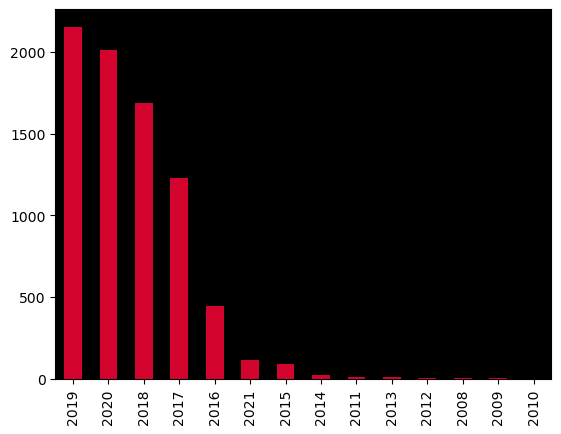

In [24]:
df['Year'].value_counts().plot(kind='bar', color='#D2042D')

#defining background color
sns.set_style(rc = {'axes.facecolor': 'black'})

<Axes: xlabel='Category'>

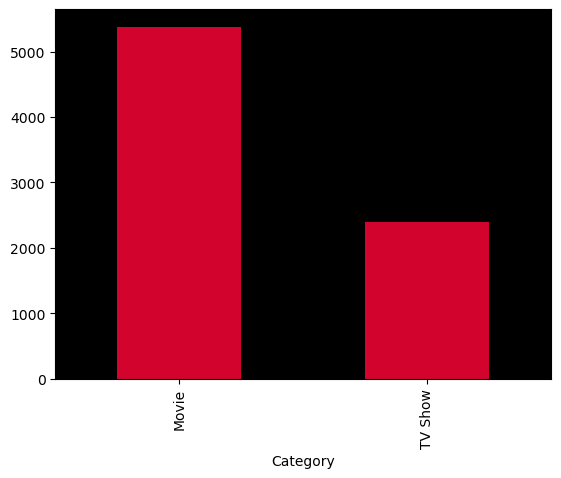

In [25]:
df.groupby('Category').Category.count().plot(kind='bar', color='#D2042D')

In [26]:
##Cleaning 2

In [27]:
countries= df['Country'].value_counts().sort_values(ascending=False)

In [31]:
countries

United States                                                   2549
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
India, Pakistan                                                    1
United Kingdom, Belgium                                            1
United Kingdom, India, Sweden                                      1
Lebanon, Qatar                                                     1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 681, dtype: int64

<Axes: >

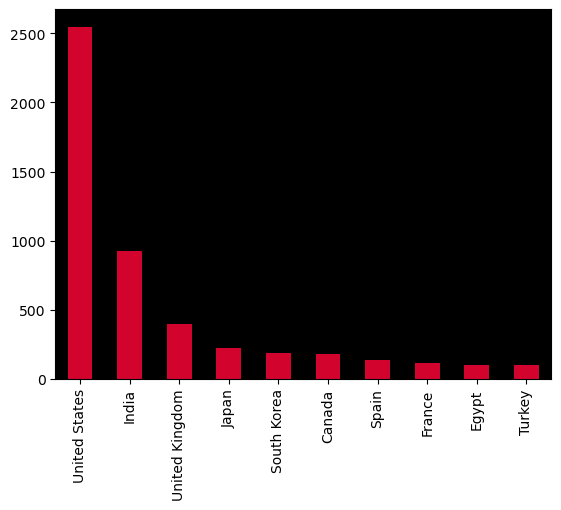

In [28]:
countries.head(10).plot(kind='bar', color='#D2042D')

<Axes: >

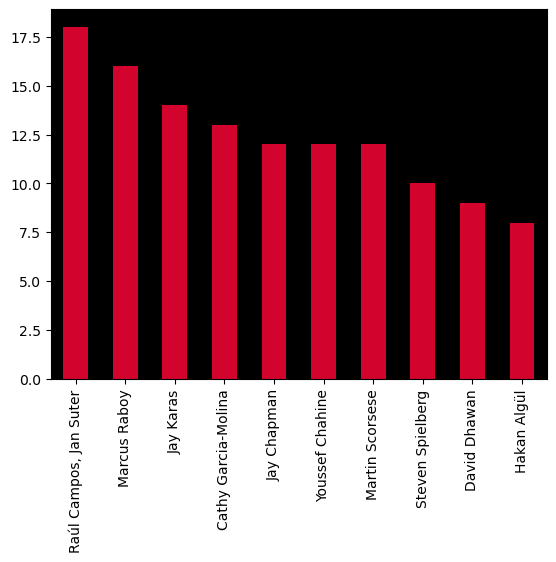

In [32]:
directors= df['Director'].value_counts().head(10)
directors.plot(kind='bar', color='#D2042D')

In [34]:
##Cleaning 3

In [35]:
genre_list = [i for i in df['Type']]
cleaned_list = [value.strip() for item in genre_list for value in item.split(',')]
unique_list = list(set(cleaned_list))
unique_list

['TV Comedies',
 'Classic & Cult TV',
 'Independent Movies',
 'Docuseries',
 "Kids' TV",
 'Stand-Up Comedy & Talk Shows',
 'Teen TV Shows',
 'Anime Features',
 'Dramas',
 'International Movies',
 'Romantic Movies',
 'LGBTQ Movies',
 'TV Mysteries',
 'Stand-Up Comedy',
 'TV Horror',
 'Music & Musicals',
 'Anime Series',
 'Action & Adventure',
 'Korean TV Shows',
 'TV Shows',
 'Documentaries',
 'TV Thrillers',
 'Crime TV Shows',
 'Cult Movies',
 'Movies',
 'British TV Shows',
 'Science & Nature TV',
 'TV Sci-Fi & Fantasy',
 'Sports Movies',
 'Faith & Spirituality',
 'TV Action & Adventure',
 'Classic Movies',
 'Sci-Fi & Fantasy',
 'Children & Family Movies',
 'TV Dramas',
 'Reality TV',
 'Spanish-Language TV Shows',
 'Romantic TV Shows',
 'Horror Movies',
 'Thrillers',
 'International TV Shows',
 'Comedies']

In [36]:
country_list = [i for i in df['Country']]
cleaned_country = [value.strip() for item in country_list for value in str(item).split(',') if pd.notna(item)]
unique_country = list(set(cleaned_country))
unique_country.sort()
unique_country

['',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Phil

In [38]:
##Simple interactive table in dash app
#Import the necessary libraries

In [40]:
!pip install pandas dash
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
from dash import dash_table
from dash.dash_table.Format import Group

In [42]:
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True

In [43]:
year_list = [i for i in range(2010, 2020, 1)]


@app.callback(
    Output('table', 'data'),  
    Input('input-country', 'value'),
    Input('input-year', 'value'),
    Input('input-category', 'value'),
    Input('input-genre', 'value'),
)
def update_table(selected_country, selected_year, selected_category, selected_genre):
    filtered_df = df.copy()  
    
    if selected_country:
        filtered_df = filtered_df[filtered_df['Country'] == selected_country]
    if selected_year:
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]
    if selected_category:
        filtered_df = filtered_df[filtered_df['Category'] == selected_category]
    if selected_genre:
        filtered_df = filtered_df[filtered_df['Type'].str.contains(selected_genre, case=False)]

    if filtered_df.empty:
        return []
    else:
        table_data = filtered_df.to_dict('records')
        return table_data

table = dash_table.DataTable(
    id='table',
    columns=[{'name': col, 'id': col} for col in df.columns],  
    data=df.to_dict('records'),  
)

app.layout = html.Div(children=[
        html.Link(href='https://fonts.googleapis.com/css?family=Bebas Neue', rel='stylesheet'),
    html.H1('NETFLIX 2010-2019', style={'textAlign': 'center', 'color': '#D2042D', 'font-size': '40px', 'font-family':'Bebas Neue', 'margin-top':'3em'}),
    html.Div([
        html.Div([
            html.H2('COUNTRY:', style={'margin-right': '2em', 'font-family':'Bebas Neue', 'color': '#D2042D'}),
        ]),
        dcc.Dropdown(
            id='input-country', 
            options=[{'label': i, 'value': i} for i in unique_country], 
            placeholder='Select a country:', style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlign': 'center'},
        )
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-bottom': '10px', 'background-color':'#080808'}),  
    html.Div([
        html.Div([
            html.H2('YEAR:', style={'margin-right': '3em', 'font-family':'Bebas Neue', 'color': '#D2042D'}),
        ]),
        dcc.Dropdown(
            id='input-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            style={'width': '80%', 'padding': '4px', 'font-size': '20px', 'textAlign': 'center'},       
        )
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-bottom': '10px', 'background-color':'#080808'}),
    html.Div([
        html.Div([
            html.H2('CATEGORY:', style={'margin-right': '2em', 'color': '#D2042D', 'font-family':'Bebas Neue'})
        ]),
        dcc.Dropdown(
            id='input-category',
            options=[{'label': 'Movie', 'value': 'Movie'},
                     {'label':'TV Show', 'value': 'TV Show'}],
            placeholder='Select a category',
            style={'width': '80%', 'padding': '1px', 'font-size': '20px', 'textAlign': 'center'},       
        )
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-bottom': '10px', 'background-color':'#080808'}),
    html.Div([
        html.Div([
            html.H2('GENRE:', style={'margin-right': '3em', 'font-family':'Bebas Neue', 'color': '#D2042D'})
        ]),
        dcc.Dropdown(
            id='input-genre',
            options=[{'label': i, 'value': i} for i in df['Type'].unique()],
            placeholder='Select a genre',
            style={'width': '80%', 'padding': '4px', 'font-size': '20px', 'textAlign': 'center'},       
        )
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-bottom': '10px', 'background-color':'#080808'}),
    dash_table.DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in df.columns],  
        data=df.to_dict('records'),  
    ),
], style={'background-color':'#080808'})

In [44]:
if __name__ == '__main__':
    app.run_server(mode='inline')